In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf
# Download historical stock data for Apple Inc. (AAPL)
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Reset index to get 'Date' as a column
stock_data.reset_index(inplace=True)

# Create a new column 'Days' representing the number of days since the start
stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days

# Features (X) and target (y)
X = stock_data[['Days']]
y = stock_data['Close']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
# Transform the test set
X_test_poly = poly.transform(X_test)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Predict future stock prices (e.g., next 30 days)
future_days = 30
last_day = stock_data['Days'].max()
future_X = np.arange(last_day + 1, last_day + future_days + 1).reshape(-1, 1)
future_X_poly = poly.transform(future_X)
future_predictions = model.predict(future_X_poly)


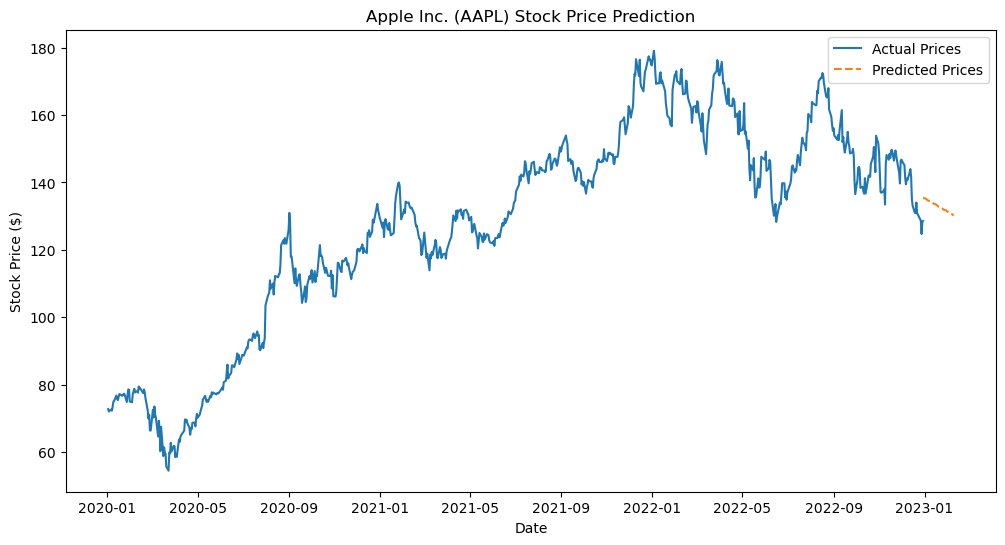

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Actual Prices')
plt.plot(pd.date_range(stock_data['Date'].max(), periods=future_days, freq='B'), future_predictions, label='Predicted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title('Apple Inc. (AAPL) Stock Price Prediction')
plt.legend()
plt.show()
